In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('cdmx.csv',delimiter=';')
data.fillna('',inplace=True)
data.head()

,Año,Mes,Alcaldía,Categoría de delito,Delito,Agencia,Unidad de investigación,Fecha inicio,Fiscalía,Calle1,Calle2,Colonia,Latitud,Longitud,Mes y año,Geopoint
0,2018,Julio,IZTACALCO,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,ROBO DE MOTOCICLETA SIN VIOLENCIA,IZC-2,UI-3SD,2018-07-22T10:51:41-05:00,INVESTIGACIÓN EN IZTACALCO,AVENIDA JAVIER ROJO GÓMEZ,,AGRÍCOLA ORIENTAL,19.3912,-99.0741,2018-07,"19.391236926, -99.0740725583"
1,2018,Julio,CUAJIMALPA DE MORELOS,DELITO DE BAJO IMPACTO,USO DE DOCUMENTO FALSO,CJ-1,UI-1SD,2018-07-22T10:52:16-05:00,INVESTIGACIÓN EN CUAJIMALPA,AV. VASCO DE QUIROGA,,LA ROSITA,19.3628,-99.2745,2018-07,"19.3628010029, -99.2745241563"
2,2018,Julio,CUAUHTEMOC,DELITO DE BAJO IMPACTO,ABUSO DE AUTORIDAD,B,UI-3CD,2018-07-22T10:55:23-05:00,INVESTIGACIÓN DE LOS DELITOS COMETIDOS POR SER...,ALLENDE,REFORMA,CENTRO,19.4424,-99.1371,2018-07,"19.4423612777, -99.1371129267"
3,2018,Julio,TLAHUAC,DELITO DE BAJO IMPACTO,ROBO DE OBJETOS,TLH-1,UI-3SD,2018-07-22T10:57:20-05:00,INVESTIGACIÓN EN TLAHUAC,CERRADA GITANA,SAN RAFAEL ATLIXO,LA NOPALERA,19.3001,-99.0535,2018-07,"19.300059781, -99.0535382873"
4,2018,Julio,VENUSTIANO CARRANZA,DELITO DE BAJO IMPACTO,VIOLENCIA FAMILIAR,VC-3,UI-1SD,2018-07-22T11:04:28-05:00,INVESTIGACIÓN EN VENUSTIANO CARRANZA,GUILLERMO PRIETO NUMERO 57,,JAMAICA,19.4069,-99.1242,2018-07,"19.4068823719, -99.1242125382"


In [2]:
data16 = data.loc[data['Año']== 2016]
data17 = data.loc[data['Año']== 2017]
data18 = data.loc[data['Año']== 2018]

In [3]:
g16 = data16.groupby(['Mes']).count().reset_index()
g16.drop(columns=['Categoría de delito','Delito','Agencia','Unidad de investigación','Fecha inicio','Fiscalía','Alcaldía','Calle1','Calle2','Colonia','Latitud','Longitud','Mes y año','Año'],inplace=True)
g16.columns = ['Mes','Count']
g16.set_index('Mes',inplace=True)

g16.index = pd.CategoricalIndex(g16.index, categories=['Enero', 'Febrero', 'Marzo', 'Abril','Mayo','Junio', 'Julio', 'Agosto','Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], ordered=True)
g16 = g16.sort_index()
sns.set(style="whitegrid")


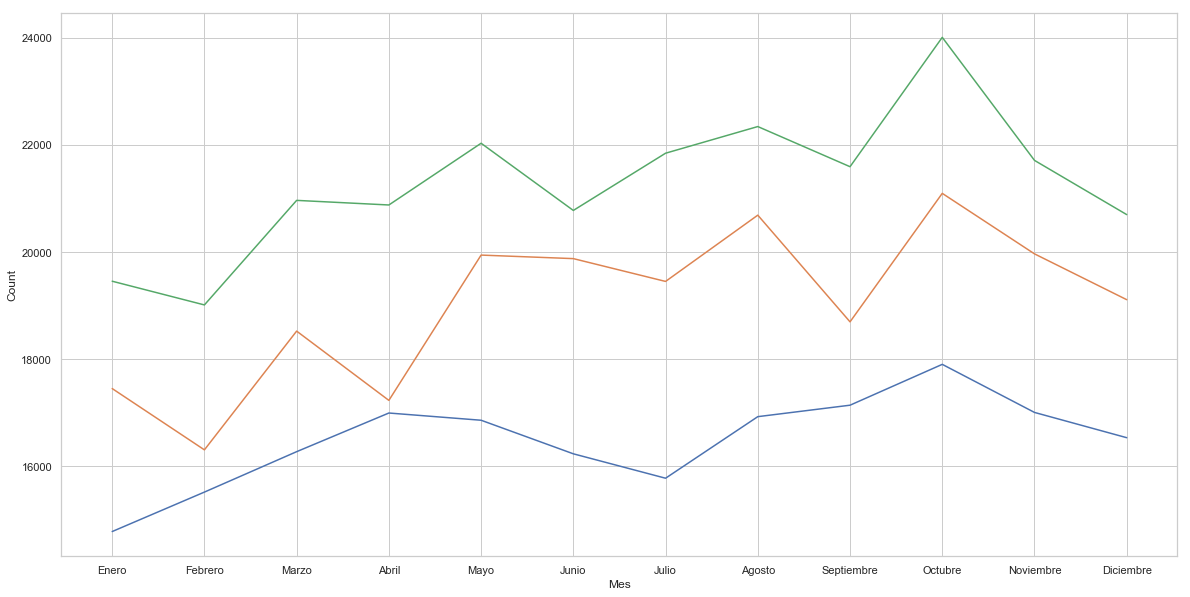

In [4]:
g17 = data17.groupby(['Mes']).count().reset_index()
g17.drop(columns=['Categoría de delito','Delito','Agencia','Unidad de investigación','Fecha inicio','Fiscalía','Alcaldía','Calle1','Calle2','Colonia','Latitud','Longitud','Mes y año','Año'],inplace=True)
g17.columns = ['Mes','Count']
g17.set_index('Mes',inplace=True)

g17.index = pd.CategoricalIndex(g17.index, categories=['Enero', 'Febrero', 'Marzo', 'Abril','Mayo','Junio', 'Julio', 'Agosto','Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], ordered=True)
g17 = g17.sort_index()

g18 = data18.groupby(['Mes']).count().reset_index()
g18.drop(columns=['Categoría de delito','Delito','Agencia','Unidad de investigación','Fecha inicio','Fiscalía','Alcaldía','Calle1','Calle2','Colonia','Latitud','Longitud','Mes y año','Año'],inplace=True)
g18.columns = ['Mes','Count']
g18.set_index('Mes',inplace=True)

g18.index = pd.CategoricalIndex(g18.index, categories=['Enero', 'Febrero', 'Marzo', 'Abril','Mayo','Junio', 'Julio', 'Agosto','Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], ordered=True)
g18 = g18.sort_index()

plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
sns.lineplot(x=g16.index, y="Count",data=g16)
sns.lineplot(x=g17.index, y="Count",data=g17)
sns.lineplot(x=g18.index, y="Count",data=g18)

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


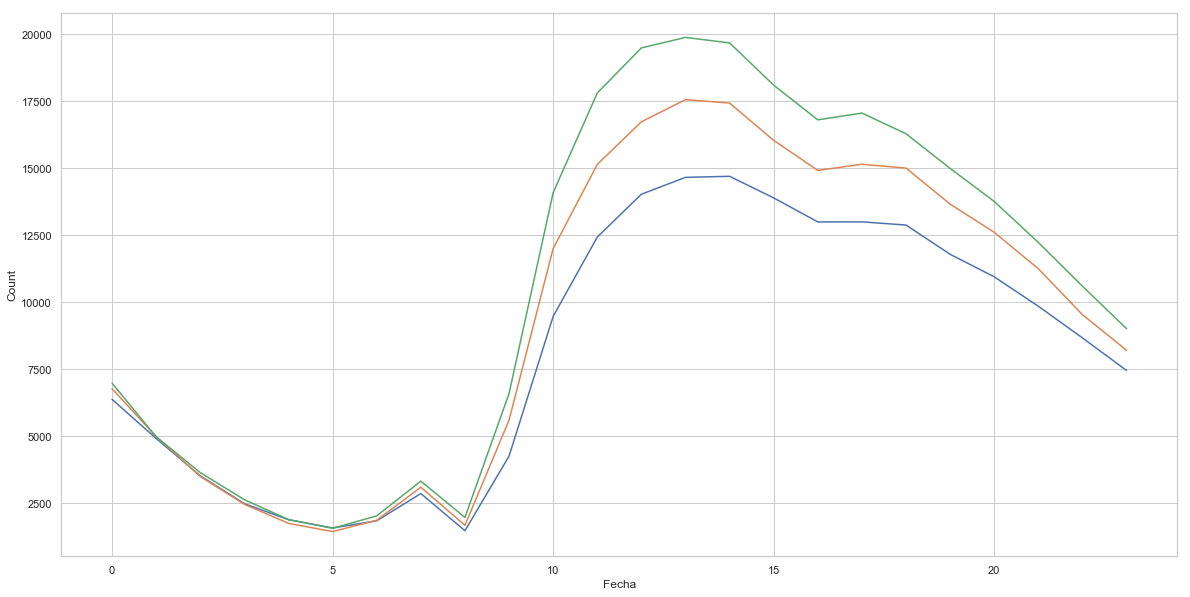

In [5]:
#data16Oct = data16.loc[data16['Mes']== 'Octubre']
data16Oct = data16

data16Oct.loc[:,'Fecha inicio'] = pd.to_datetime(data16Oct['Fecha inicio'])
data16Oct.loc[:,'Fecha'] = data16Oct['Fecha inicio'].dt.hour
data16Octgroup = data16Oct.groupby('Fecha').count().reset_index()
data16Octgroup = data16Octgroup[['Fecha','Mes']]
data16Octgroup.columns = ['Fecha','Count']

#data17Oct = data17.loc[data17['Mes']== 'Octubre']
data17Oct = data17

data17Oct.loc[:,'Fecha inicio'] = pd.to_datetime(data17Oct['Fecha inicio'])
data17Oct.loc[:,'Fecha'] = data17Oct['Fecha inicio'].dt.hour
data17Octgroup = data17Oct.groupby('Fecha').count().reset_index()
data17Octgroup = data17Octgroup[['Fecha','Mes']]
data17Octgroup.columns = ['Fecha','Count']

#data18Oct = data18.loc[data18['Mes']== 'Octubre']
data18Oct = data18

data18Oct.loc[:,'Fecha inicio'] = pd.to_datetime(data18Oct['Fecha inicio'])
data18Oct.loc[:,'Fecha'] = data18Oct['Fecha inicio'].dt.hour
data18Octgroup = data18Oct.groupby('Fecha').count().reset_index()
data18Octgroup = data18Octgroup[['Fecha','Mes']]
data18Octgroup.columns = ['Fecha','Count']

plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
sns.lineplot(x='Fecha', y="Count",data=data16Octgroup)
sns.lineplot(x='Fecha', y="Count",data=data17Octgroup)
sns.lineplot(x='Fecha', y="Count",data=data18Octgroup)

In [6]:
c16 = data16.groupby(['Calle1','Calle2']).count().reset_index()
c16.drop(columns=['Categoría de delito','Delito','Agencia','Unidad de investigación','Fecha inicio','Fiscalía','Alcaldía','Colonia','Latitud','Longitud','Mes y año','Año','Fecha','Mes'],inplace=True)
c16.sort_values(by='Geopoint',ascending=False).to_csv('calles.csv')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


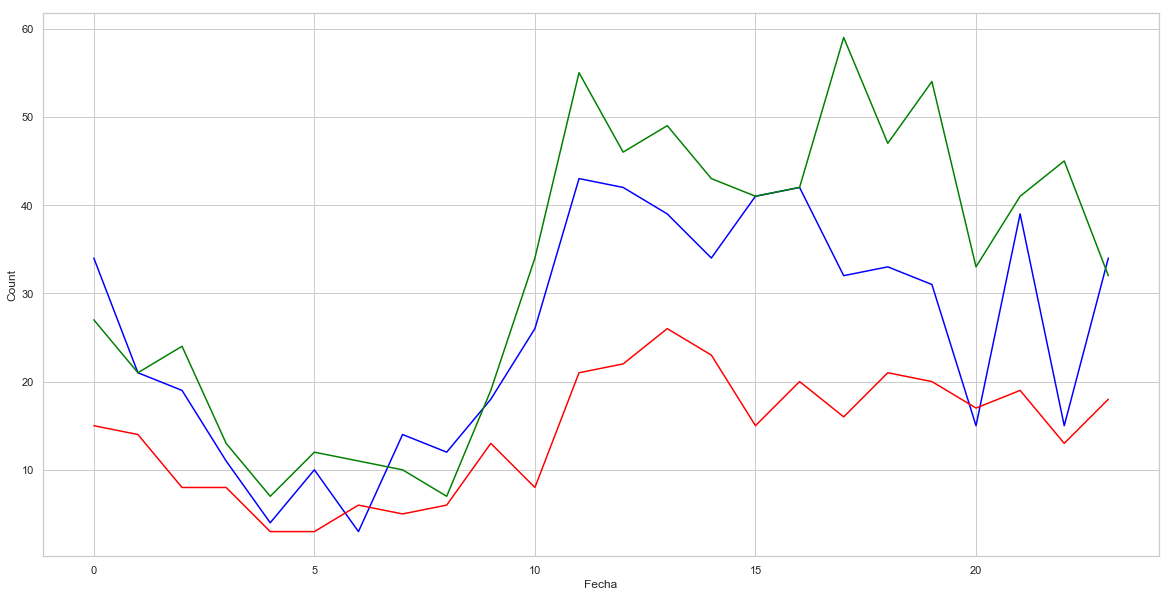

In [7]:
data16v = data16.loc[data16['Categoría de delito']=='VIOLACIÓN']
data16v.loc[:,'Fecha inicio'] = pd.to_datetime(data16v['Fecha inicio'])
data16v.loc[:,'Fecha'] = data16v['Fecha inicio'].dt.hour
data16vgroup = data16v.groupby('Fecha').count().reset_index()
data16vgroup = data16vgroup[['Fecha','Mes']]
data16vgroup.columns = ['Fecha','Count']

data17v = data17.loc[data17['Categoría de delito']=='VIOLACIÓN']
data17v.loc[:,'Fecha inicio'] = pd.to_datetime(data17v['Fecha inicio'])
data17v.loc[:,'Fecha'] = data17v['Fecha inicio'].dt.hour
data17vgroup = data17v.groupby('Fecha').count().reset_index()
data17vgroup = data17vgroup[['Fecha','Mes']]
data17vgroup.columns = ['Fecha','Count']

data18v = data18.loc[data18['Categoría de delito']=='VIOLACIÓN']
data18v.loc[:,'Fecha inicio'] = pd.to_datetime(data18v['Fecha inicio'])
data18v.loc[:,'Fecha'] = data18v['Fecha inicio'].dt.hour
data18vgroup = data18v.groupby('Fecha').count().reset_index()
data18vgroup = data18vgroup[['Fecha','Mes']]
data18vgroup.columns = ['Fecha','Count']

plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
sns.lineplot(x='Fecha', y="Count",data=data16vgroup,color="blue")
sns.lineplot(x='Fecha', y="Count",data=data17vgroup,color="red")
sns.lineplot(x='Fecha', y="Count",data=data18vgroup,color="green")

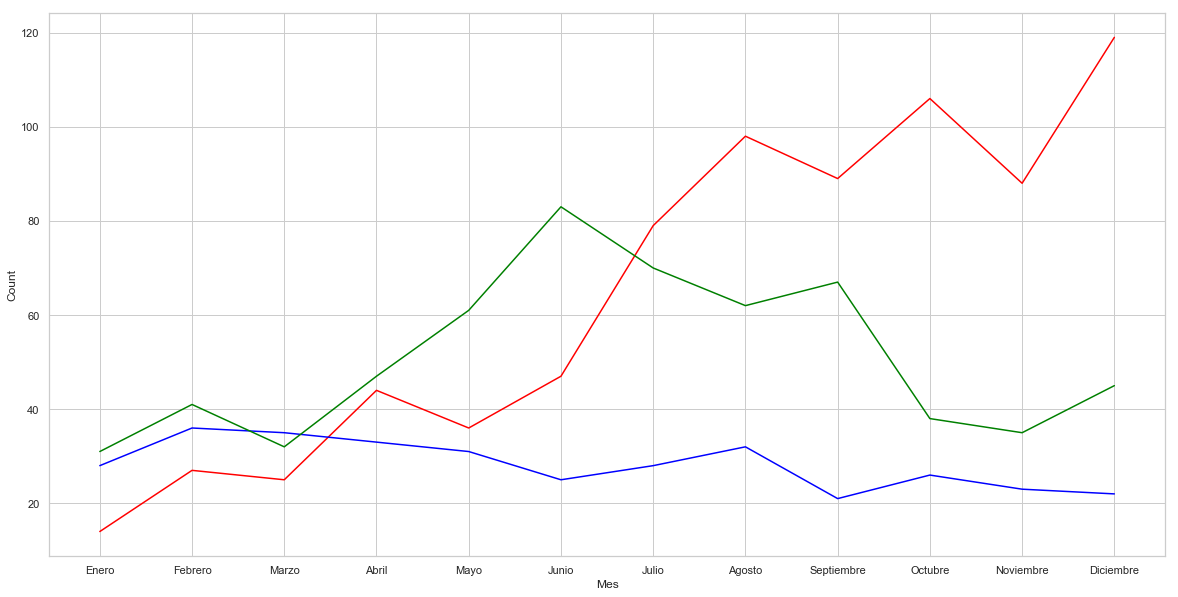

In [8]:
v18 = data18v.groupby(['Mes']).count().reset_index()
v18.drop(columns=['Categoría de delito','Delito','Agencia','Unidad de investigación','Fecha inicio','Fiscalía','Alcaldía','Calle1','Calle2','Colonia','Latitud','Longitud','Mes y año','Año','Fecha'],inplace=True)
v18.columns = ['Mes','Count']
v18.set_index('Mes',inplace=True)

v18.index = pd.CategoricalIndex(v18.index, categories=['Enero', 'Febrero', 'Marzo', 'Abril','Mayo','Junio', 'Julio', 'Agosto','Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], ordered=True)
v18 = v18.sort_index()

v17 = data17v.groupby(['Mes']).count().reset_index()
v17.drop(columns=['Categoría de delito','Delito','Agencia','Unidad de investigación','Fecha inicio','Fiscalía','Alcaldía','Calle1','Calle2','Colonia','Latitud','Longitud','Mes y año','Año','Fecha'],inplace=True)
v17.columns = ['Mes','Count']
v17.set_index('Mes',inplace=True)

v17.index = pd.CategoricalIndex(v17.index, categories=['Enero', 'Febrero', 'Marzo', 'Abril','Mayo','Junio', 'Julio', 'Agosto','Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], ordered=True)
v17 = v17.sort_index()

v16 = data16v.groupby(['Mes']).count().reset_index()
v16.drop(columns=['Categoría de delito','Delito','Agencia','Unidad de investigación','Fecha inicio','Fiscalía','Alcaldía','Calle1','Calle2','Colonia','Latitud','Longitud','Mes y año','Año','Fecha'],inplace=True)
v16.columns = ['Mes','Count']
v16.set_index('Mes',inplace=True)

v16.index = pd.CategoricalIndex(v16.index, categories=['Enero', 'Febrero', 'Marzo', 'Abril','Mayo','Junio', 'Julio', 'Agosto','Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], ordered=True)
v16 = v16.sort_index()

plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
sns.lineplot(x=v18.index, y="Count",data=v18,color='red')
sns.lineplot(x=v17.index, y="Count",data=v17,color='blue')
sns.lineplot(x=v16.index, y="Count",data=v16,color='green')

In [9]:
data16v = data16v.loc[(data16v['Longitud'] != '') & (data16v['Latitud'] != '')]
data17v = data17v.loc[(data17v['Longitud'] != '') & (data17v['Latitud'] != '')]
data18v = data18v.loc[(data18v['Longitud'] != '') & (data18v['Latitud'] != '')]

import folium
 
# Make an empty map
m = folium.Map(location=[19.40,-99.12], tiles='stamentoner', zoom_start=11)

# I can add marker one by one on the map
for i in range(0,len(data16v)):
    folium.Circle(
        location=[data16v.iloc[i]['Latitud'], data16v.iloc[i]['Longitud']],
        popup=data16v.iloc[i]['Delito'],
        radius=10,
        color='crimson',
        fill=True
    ).add_to(m)
    
for i in range(0,len(data17v)):
    folium.Circle(
        location=[data17v.iloc[i]['Latitud'], data17v.iloc[i]['Longitud']],
        popup=data17v.iloc[i]['Delito'],
        radius=10,
        color='crimson',
        fill=True
    ).add_to(m)

for i in range(0,len(data18v)):
    folium.Circle(
        location=[data18v.iloc[i]['Latitud'], data18v.iloc[i]['Longitud']],
        popup=data18v.iloc[i]['Delito'],
        radius=10,
        color='crimson',
        fill=True
    ).add_to(m)

# Save it as html
m.save('mymap.html')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


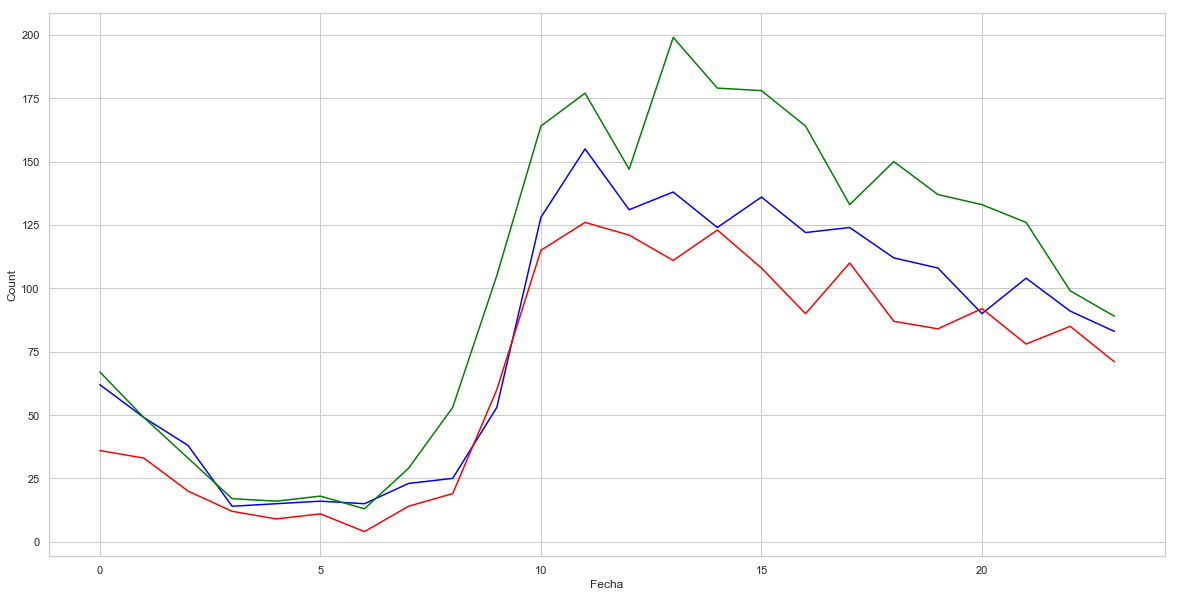

In [10]:
data16v = data16.loc[data16['Delito']=='ABUSO SEXUAL']
data16v.loc[:,'Fecha inicio'] = pd.to_datetime(data16v['Fecha inicio'])
data16v.loc[:,'Fecha'] = data16v['Fecha inicio'].dt.hour
data16vgroup = data16v.groupby('Fecha').count().reset_index()
data16vgroup = data16vgroup[['Fecha','Mes']]
data16vgroup.columns = ['Fecha','Count']

data17v = data17.loc[data17['Delito']=='ABUSO SEXUAL']
data17v.loc[:,'Fecha inicio'] = pd.to_datetime(data17v['Fecha inicio'])
data17v.loc[:,'Fecha'] = data17v['Fecha inicio'].dt.hour
data17vgroup = data17v.groupby('Fecha').count().reset_index()
data17vgroup = data17vgroup[['Fecha','Mes']]
data17vgroup.columns = ['Fecha','Count']

data18v = data18.loc[data18['Delito']=='ABUSO SEXUAL']
data18v.loc[:,'Fecha inicio'] = pd.to_datetime(data18v['Fecha inicio'])
data18v.loc[:,'Fecha'] = data18v['Fecha inicio'].dt.hour
data18vgroup = data18v.groupby('Fecha').count().reset_index()
data18vgroup = data18vgroup[['Fecha','Mes']]
data18vgroup.columns = ['Fecha','Count']

plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
sns.lineplot(x='Fecha', y="Count",data=data16vgroup,color="blue")
sns.lineplot(x='Fecha', y="Count",data=data17vgroup,color="red")
sns.lineplot(x='Fecha', y="Count",data=data18vgroup,color="green")

In [25]:
data16v = data16v.loc[(data16v['Longitud'] != '') & (data16v['Latitud'] != '')]
data17v = data17v.loc[(data17v['Longitud'] != '') & (data17v['Latitud'] != '')]
data18v = data18v.loc[(data18v['Longitud'] != '') & (data18v['Latitud'] != '')]

import folium
 
# Make an empty map
m = folium.Map(location=[19.40,-99.12], tiles='cartodbdark_matter', zoom_start=11)

# I can add marker one by one on the map
for i in range(0,len(data16v)):
    folium.Circle(
        location=[data16v.iloc[i]['Latitud'], data16v.iloc[i]['Longitud']],
        popup=data16v.iloc[i]['Delito'],
        radius=2,
        color='orange',
        fill=True,
        fill_color='orange',
        fill_opacity=0.2
    ).add_to(m)
    
for i in range(0,len(data17v)):
    folium.Circle(
        location=[data17v.iloc[i]['Latitud'], data17v.iloc[i]['Longitud']],
        popup=data17v.iloc[i]['Delito'],
        radius=2,
        color='orange',
        fill=True,
        fill_color='orange',
        fill_opacity=0.2
    ).add_to(m)

for i in range(0,len(data18v)):
    folium.Circle(
        location=[data18v.iloc[i]['Latitud'], data18v.iloc[i]['Longitud']],
        popup=data18v.iloc[i]['Delito'],
        radius=2,
        color='orange',
        fill=True,
        fill_color='orange',
        fill_opacity=0.2
    ).add_to(m)

# Save it as html
m.save('mymap2.html')

VIOLENCIA FAMILIAR                                                                18681
ROBO DE OBJETOS                                                                   15156
ROBO A NEGOCIO SIN VIOLENCIA                                                      13322
DENUNCIA DE HECHOS                                                                12029
FRAUDE                                                                            11643
AMENAZAS                                                                          10105
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA                                     6299
ROBO A CASA HABITACION SIN VIOLENCIA                                               5774
ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA                              5712
FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMENTOS DE CREDITO PUBLICO               4579
ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO                                        3836
ROBO DE ACCESORIOS DE AUTO      